In [1]:
import numpy as np

In [67]:
import pandas as pd
steering = pd.read_csv("C://Users//Abhijeet//Documents//GitHub//computervision//autodrive//autonomous_driving//challenge//data//training//training//steering_angles.csv",header=None)

In [73]:
angles = steering.iloc[: , 1].values

In [168]:
nbins = 100
#bins = np.linspace(-170 , 30 , nbins+1)
bins = np.quantile(angles, np.linspace(0 , 1 , nbins))

In [169]:
y = angles
yhat = np.random.normal(0,20 , 100)

def one_hot_bin(vals):
    a = np.digitize(vals , bins)
    a = np.array([np.arange(i-4 , i+5) for i in a])
    #print(a.shape)
    b = np.zeros((a.shape[0], nbins))
    
    for i,_ in enumerate(b):
        maskeda = np.ma.masked_where(np.logical_or(a[i] < 0 , a[i] > nbins-1),a[i]).filled(0)
        val = np.ma.masked_where(np.logical_or(a[i] < 0 , a[i] > nbins-1),hill).filled(0)
        #print(maskeda  ,nbins , val)
        #val = np.dot(val ,hill)
        #print(val)
        b[i , maskeda] = val
    
    return b

In [170]:
from plotnine import *

In [171]:
pd.DataFrame({"angles" : angles})["angles"].quantile(np.linspace(0 , 1 , 60)).values

array([-165.42462913, -150.88538586, -148.1942    , -145.86310044,
       -143.64767381, -141.00885442, -137.14577487, -125.09405084,
       -116.31497025, -111.29884836, -109.15342886, -108.22708727,
       -107.78615329, -106.9691956 , -105.03482296, -103.51007813,
       -101.57004533, -100.62623516,  -99.43388253,  -97.43585274,
        -94.7868212 ,  -92.18808135,  -90.50659417,  -88.21478712,
        -84.15747418,  -82.0860291 ,  -77.7580707 ,  -74.92809547,
        -70.70698705,  -66.16113032,  -61.80475723,  -57.88689929,
        -51.20515717,  -43.26316219,  -36.26888178,  -29.92931414,
        -24.12491628,  -18.36614063,  -13.82840748,  -10.90400185,
         -8.92023966,   -6.73058471,   -5.27379763,   -3.49203446,
         -2.10695637,   -0.58871261,    0.20127974,    0.91574473,
          2.17376261,    2.77782323,    2.95098204,    3.18427639,
          3.67829673,    4.47583382,    5.4832162 ,    6.94695917,
          7.64734113,    9.24882546,   12.51650472,   23.00321

C:\Users\Abhijeet\Documents\GitHub\Datathon\dt\lib\site-packages\plotnine\stats\stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 11'. Pick better value with 'binwidth'.


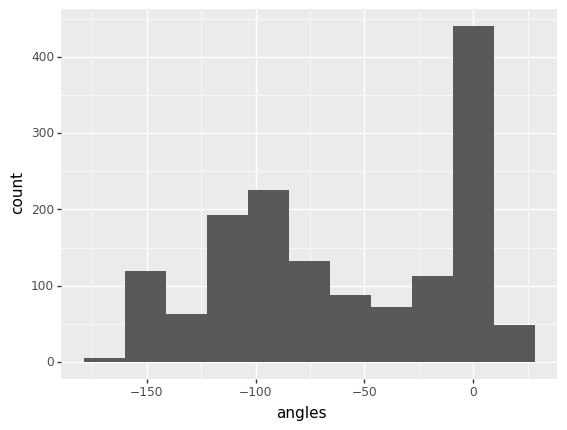

<ggplot: (-9223371859696829461)>

In [172]:
ggplot(pd.DataFrame({"angles" : angles}) , aes(x="angles")) + geom_histogram()

In [173]:
y

array([   2.81514843,    2.81514843,    2.81514843, ..., -105.82207699,
       -109.46695479, -113.51461557])

In [174]:
hill = np.array([ 0.10, 0.32, 0.61, 0.89,1.00,0.89,0.61,0.32, 0.10])

In [175]:
y_bin = one_hot_bin(y)

In [176]:
y_bin

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [192]:
y_hat_bin = one_hot_bin(yhat)

In [177]:
bins

array([-1.65424629e+02, -1.51722083e+02, -1.50131244e+02, -1.48550181e+02,
       -1.47374159e+02, -1.45934663e+02, -1.44563751e+02, -1.43257956e+02,
       -1.41722988e+02, -1.40588102e+02, -1.37403811e+02, -1.32027704e+02,
       -1.23713010e+02, -1.18140847e+02, -1.13927149e+02, -1.11635245e+02,
       -1.09760109e+02, -1.08905308e+02, -1.08311537e+02, -1.08074905e+02,
       -1.07819689e+02, -1.07531426e+02, -1.06933291e+02, -1.05696709e+02,
       -1.04657627e+02, -1.03757305e+02, -1.02162097e+02, -1.01385706e+02,
       -1.00835970e+02, -1.00013259e+02, -9.96290201e+01, -9.85955907e+01,
       -9.74187967e+01, -9.54638069e+01, -9.44244519e+01, -9.24344557e+01,
       -9.13803499e+01, -9.04542430e+01, -8.91740813e+01, -8.69152439e+01,
       -8.48270265e+01, -8.32916972e+01, -8.20154590e+01, -7.96998779e+01,
       -7.67129445e+01, -7.53706812e+01, -7.27678184e+01, -7.07063640e+01,
       -6.79771348e+01, -6.52282750e+01, -6.27020981e+01, -5.96584302e+01,
       -5.79623798e+01, -

In [178]:
(bins[np.argmax(y_bin[0])-1] + bins[np.argmax(y_bin[0])])/2

2.9045001228849863

In [179]:
y[0]

2.8151484265000586

In [180]:
(bins[i-1] + bins[i])/2

array([   2.90450012,    2.90450012,    2.90450012, ..., -106.31500009,
       -109.33270856, -112.78119675])

In [188]:
i = np.argmax(y_bin , axis=1)
preds = (bins[i-1] + bins[i])/2

In [191]:
y_bin

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [182]:
np.sqrt(np.mean((y-preds)**2))

0.8623456099219604

In [183]:
np.sum((y-preds)**2) / y.shape[0]

0.7436399509516779

In [185]:
y_hat_bin

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [186]:
np.sum((y_bin - y_hat_bin)**2) / y.shape[0]

ValueError: operands could not be broadcast together with shapes (1500,100) (100,100) 

In [187]:
bins[50 : 60]

array([-62.70209811, -59.65843018, -57.96237982, -55.09780764,
       -49.87114345, -44.83398662, -41.42983655, -37.11899875,
       -32.9104051 , -29.21395843])

In [45]:
for i in range(0,10):
    print(vals[i] , a[i] , (bins[a[i][4]-1] + bins[a[i][4]])/2 )

13.286126220383771 [52 53 54 55 56 57 58 59 60] 11.874999999999986
-15.684806683754397 [43 44 45 46 47 48 49 50 51] -14.375000000000014
14.596142200687165 [53 54 55 56 57 58 59 60 61] 14.791666666666657
1.850672961658063 [49 50 51 52 53 54 55 56 57] 3.124999999999986
20.823880602261475 [55 56 57 58 59 60 61 62 63] 20.624999999999986
-21.171910590447098 [41 42 43 44 45 46 47 48 49] -20.208333333333343


IndexError: index 61 is out of bounds for axis 0 with size 61

In [36]:
vals[0]

13.286126220383771

In [37]:
a[0]

array([52, 53, 54, 55, 56, 57, 58, 59, 60], dtype=int64)

In [38]:
bins[a[0][4]]

13.333333333333314

In [33]:
bins[a[0]]

array([ 1.66666667,  4.58333333,  7.5       , 10.41666667, 13.33333333,
       16.25      , 19.16666667, 22.08333333, 25.        ])

In [34]:
b[0]

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.1 , 0.32, 0.61,
       0.89, 1.  , 0.89, 0.61, 0.32])

### Cross Entropy

In [200]:
np.sum(y_bin , axis=1)

array([4.84, 4.84, 4.84, ..., 4.84, 4.84, 4.84])

In [204]:
from scipy.special import softmax

In [205]:
y_bin_prob = np.apply_along_axis(lambda v : softmax(v) , 1 , y_bin)
y_bin_prob[0]

array([0.0093254 , 0.0093254 , 0.0093254 , 0.0093254 , 0.0093254 ,
       0.0093254 , 0.0093254 , 0.0093254 , 0.0093254 , 0.0093254 ,
       0.0093254 , 0.0093254 , 0.0093254 , 0.0093254 , 0.0093254 ,
       0.0093254 , 0.0093254 , 0.0093254 , 0.0093254 , 0.0093254 ,
       0.0093254 , 0.0093254 , 0.0093254 , 0.0093254 , 0.0093254 ,
       0.0093254 , 0.0093254 , 0.0093254 , 0.0093254 , 0.0093254 ,
       0.0093254 , 0.0093254 , 0.0093254 , 0.0093254 , 0.0093254 ,
       0.0093254 , 0.0093254 , 0.0093254 , 0.0093254 , 0.0093254 ,
       0.0093254 , 0.0093254 , 0.0093254 , 0.0093254 , 0.0093254 ,
       0.0093254 , 0.0093254 , 0.0093254 , 0.0093254 , 0.0093254 ,
       0.0093254 , 0.0093254 , 0.0093254 , 0.0093254 , 0.0093254 ,
       0.0093254 , 0.0093254 , 0.0093254 , 0.0093254 , 0.0093254 ,
       0.0093254 , 0.0093254 , 0.0093254 , 0.0093254 , 0.0093254 ,
       0.0093254 , 0.0093254 , 0.0093254 , 0.0093254 , 0.0093254 ,
       0.0093254 , 0.0093254 , 0.0093254 , 0.0093254 , 0.00932

In [210]:
y_pred_prob = np.random.random((y_bin_prob.shape[0],y_bin_prob.shape[1]))
y_pred_prob

array([[0.91324315, 0.61348635, 0.56609383, ..., 0.57728288, 0.08175884,
        0.0145548 ],
       [0.56536505, 0.04017134, 0.02790181, ..., 0.03209136, 0.63744532,
        0.32795143],
       [0.30138278, 0.53353511, 0.67066733, ..., 0.44862408, 0.1260673 ,
        0.390312  ],
       ...,
       [0.93762805, 0.14761012, 0.84770385, ..., 0.4305459 , 0.79131859,
        0.17001811],
       [0.10459165, 0.66697494, 0.52096174, ..., 0.29184242, 0.13525819,
        0.8543414 ],
       [0.51575633, 0.38990544, 0.96451454, ..., 0.14827123, 0.72378289,
        0.43037805]])

In [219]:
def cross_entropy(a , b):
    return np.sum(-np.multiply(a , np.log2(b)))

In [217]:
(-np.multiply(y_bin_prob , np.log2(y_pred_prob))).shape

(1500, 100)

In [220]:
p = [0.10, 0.40, 0.50]
q = [0.80, 0.15, 0.05]

cross_entropy(p,q)

3.2879430945989